In [1]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.2
gast                         0.5.4
google-auth                  2.26.2
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.28.0
ipython                      8.20.0
jedi                         0.19.1
jupyter_client               8.6.0



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

[]


In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Remove Dodge Image

In [15]:
import cv2
from PIL import Image
import numpy as np

In [8]:
dir = 'data'

In [9]:
extension = ['jpg','JPG','jpeg','JPEG','bmp','BMP','png','PNG']

In [11]:
doggyImg = []
for image_dir in os.listdir(dir):
    for image_name in os.listdir(os.path.join(dir, image_dir)):
        image_path = os.path.join(dir, image_dir, image_name)
        try:
            #img = cv2.imread(image_path)
            img1 = Image.open(image_path)
            forma = img1.format
            if forma not in extension:
                doggyImg.append(image_path)
        except Exception as e:
            print(e)
print(doggyImg)           
for i in doggyImg:
    os.remove(i)
    

[]


### Load The Data

In [16]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [89]:
data = tf.keras.utils.image_dataset_from_directory(dir)

Found 549 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [20]:
data_iterator

In [21]:
batch = data_iterator.next()

In [28]:
batch[0].shape

(32, 256, 256, 3)

In [24]:
batch[1]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

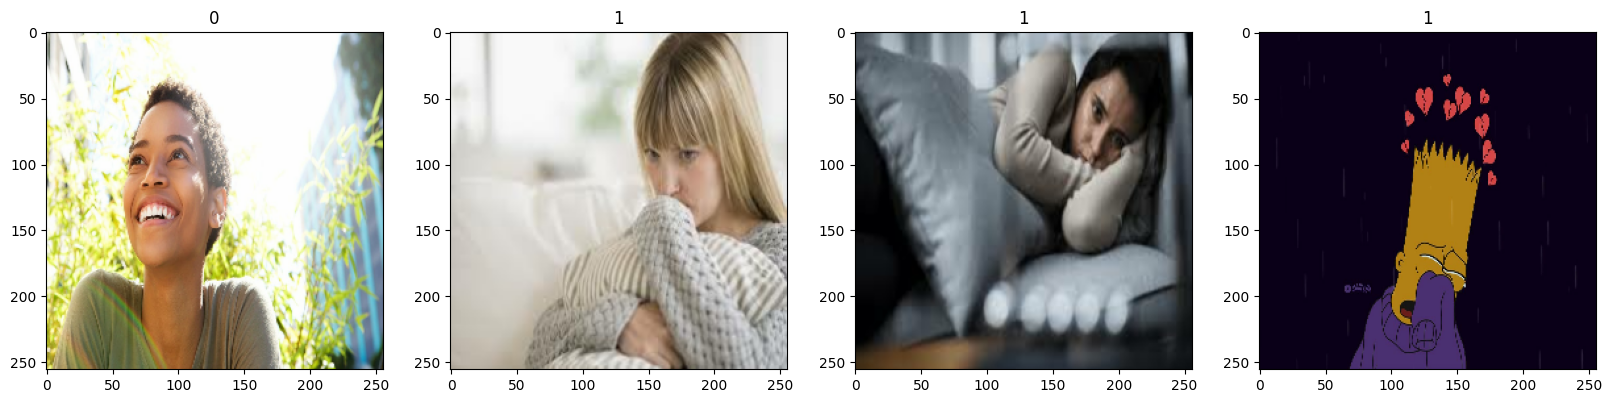

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing The Data

#### Scale The Data

In [90]:
data = data.map(lambda x, y: (x/255, y))

In [91]:
data_iterator = data.as_numpy_iterator()

In [92]:
batch = data_iterator.next()

In [93]:
batch[0].max()

1.0

#### Split The Data

In [94]:
len(data)

18

In [95]:
Train_size = int(len(data)*.7)
Val_size = int(len(data)*.2)+1
Test_size = int(len(data)*.1)+1

In [96]:
print(Train_size,Val_size,Test_size)

12 4 2


In [97]:
Train = data.take(Train_size)
Val = data.skip(Train_size).take(Val_size)
Test = data.skip(Train_size+Val_size).take(Test_size)

In [98]:
print(len(Train), len(Val), len(Test))

12 4 2


### Deep Learning Model

#### Built Deep Learning Model

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [100]:
model = Sequential()

In [101]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [104]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

### Train The Data

In [108]:
logdir = 'log'

In [109]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [111]:
hest = model.fit(Train, epochs = 20, validation_data = Val, callbacks = [tensorboard_callback])

Epoch 1/20


12/12 [==============================] - 48s 3s/step - loss: 1.0832 - accuracy: 0.4948 - val_loss: 0.6714 - val_accuracy: 0.6016
Epoch 2/20
12/12 [==============================] - 26s 2s/step - loss: 0.6540 - accuracy: 0.6328 - val_loss: 0.5772 - val_accuracy: 0.6953
Epoch 3/20
12/12 [==============================] - 25s 2s/step - loss: 0.5479 - accuracy: 0.7500 - val_loss: 0.6291 - val_accuracy: 0.6641
Epoch 4/20
12/12 [==============================] - 23s 2s/step - loss: 0.4973 - accuracy: 0.7448 - val_loss: 0.4179 - val_accuracy: 0.8359
Epoch 5/20
12/12 [==============================] - 23s 2s/step - loss: 0.3999 - accuracy: 0.8464 - val_loss: 0.3498 - val_accuracy: 0.8672
Epoch 6/20
12/12 [==============================] - 26s 2s/step - loss: 0.3996 - accuracy: 0.8255 - val_loss: 0.3697 - val_accuracy: 0.8359
Epoch 7/20
12/12 [==============================] - 24s 2s/step - loss: 0.3245 - accuracy: 0.8776 - val_loss: 0.3425 - val_accuracy: 0.8438
Epoch 8/20
12/12 [

In [117]:
hest.history

{'loss': [1.083158016204834,
  0.6539795398712158,
  0.5478917956352234,
  0.49731945991516113,
  0.39992666244506836,
  0.3995901346206665,
  0.324482798576355,
  0.2522171437740326,
  0.23598001897335052,
  0.21936295926570892,
  0.2065301388502121,
  0.1592014580965042,
  0.13901279866695404,
  0.10291284322738647,
  0.0894305631518364,
  0.0789056122303009,
  0.06010014936327934,
  0.03000846691429615,
  0.025731338188052177,
  0.021205000579357147],
 'accuracy': [0.4947916567325592,
  0.6328125,
  0.75,
  0.7447916865348816,
  0.8463541865348816,
  0.8255208134651184,
  0.8776041865348816,
  0.8932291865348816,
  0.9192708134651184,
  0.9192708134651184,
  0.9322916865348816,
  0.9479166865348816,
  0.9635416865348816,
  0.9609375,
  0.9609375,
  0.9713541865348816,
  0.9791666865348816,
  0.9973958134651184,
  0.9947916865348816,
  0.9947916865348816],
 'val_loss': [0.6713980436325073,
  0.5771724581718445,
  0.6291220188140869,
  0.41794341802597046,
  0.34984421730041504,
  0.3

### Plot Performance

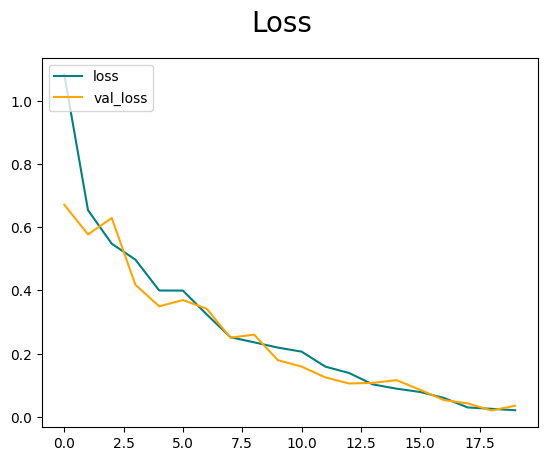

In [113]:
fig = plt.figure()
plt.plot(hest.history['loss'], color='teal', label='loss')
plt.plot(hest.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

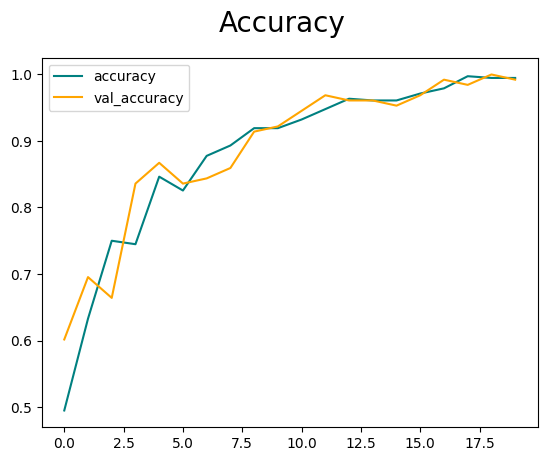

In [115]:
fig = plt.figure()
plt.plot(hest.history['accuracy'], color='teal', label='accuracy')
plt.plot(hest.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluation

#### Evaluate

In [118]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [119]:
Pre = Precision()
Rec = Recall()
BinAcc = BinaryAccuracy()

In [127]:
print(len(Test))
for batch in Test.as_numpy_iterator():
    X, y = batch
    prediction = model.predict(X)
    Pre.update_state(y, prediction)
    Rec.update_state(y, prediction)
    BinAcc.update_state(y, prediction)
    

2
1/1 [==============================] - 0s 272ms/step


In [130]:
print(f' Precision:{Pre.result().numpy()}, Recall: {Rec.result().numpy()}, BinaryAccuracy: {BinAcc.result().numpy()}')

 Precision:1.0, Recall: 1.0, BinaryAccuracy: 1.0


#### Test The Data

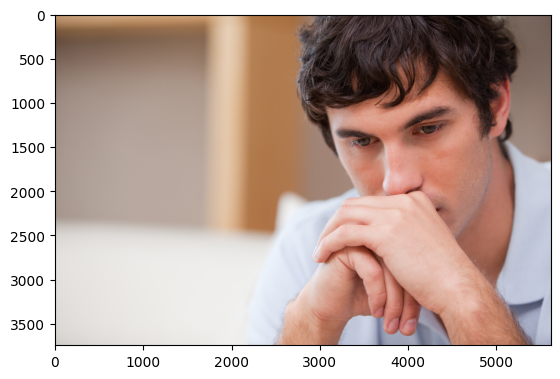

In [145]:
img = cv2.imread('S1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

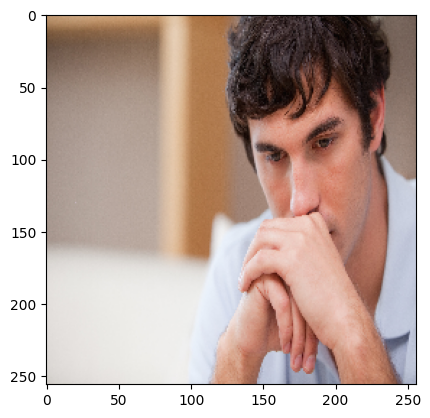

In [146]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [147]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [148]:
yhat

array([[0.9378753]], dtype=float32)

In [149]:
if yhat > 0.5:
    print(f'Predicted Image is Sad')
else:
    print(f'Predicted Image is Happy')

Predicted Image is Sad


### Save The Model

In [150]:
from tensorflow.keras.models import load_model

In [153]:
model.save(os.path.join('models', 'ImageClassificationModel.h5'))

D:\ImageClassification\ImageClassification\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [154]:
new_model = load_model(os.path.join('models', 'ImageClassificationModel.h5'))

In [155]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5:
    print(f'Predicted Image is Sad')
else:
    print(f'Predicted Image is Happy')

1/1 [==============================] - 0s 155ms/step
Predicted Image is Sad
